In [16]:
print("GROUP 1: K-MEANS CLUSTERING")

GROUP 1: K-MEANS CLUSTERING


In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.metrics import confusion_matrix
from scipy.stats import mode
from sklearn.cluster import KMeans

pd.options.mode.copy_on_write = True

In [18]:
df = pd.read_csv('penguins.csv')
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [20]:
df = df.dropna()
df.info()

#establishing which 2 features to use
feature1 = "culmen_length_mm"
feature2 = "culmen_depth_mm"

# in case 3 features will be tested
# feature3 = "flipper_length_mm"

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB


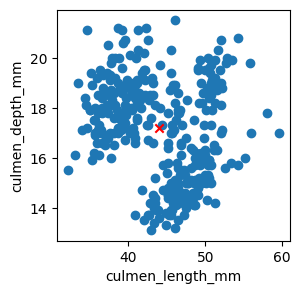

In [ ]:
adjusted_df = df[[feature1, feature2]]
adjusted_df.head()

#plotting what the current dataset looks like
centroid = [adjusted_df[feature1].mean(), adjusted_df[feature2].mean()]

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(adjusted_df[feature1], adjusted_df[feature2])
ax.scatter(centroid[0], centroid[1], color='red', marker='x') 
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
plt.show()

In [ ]:
# distance formula
def calculate_euclidean_distance(p1, p2):
    return sum((p1[i] - p2[i]) ** 2 for i in range(len(p1))) ** 0.5

In [ ]:
# assigns each data point to its respective cluster based on its distance to a centroid
def assign_clusters(data, centroids):
    clusters = [[] for _ in centroids]
    for point in data:
        distances = [calculate_euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = distances.index(min(distances))
        clusters[cluster_index].append(point)
    return clusters


In [24]:
def compute_centroids(clusters):
    new_centroids = []
    for cluster in clusters:
        if cluster:  # Avoid division by zero
            new_centroid = [sum(dim) / len(cluster) for dim in zip(*cluster)]
            new_centroids.append(new_centroid)
        else:
            new_centroids.append(random.choice(cluster))  # Assign random point if cluster is empty
    return new_centroids

In [25]:
def plot_clusters(data, centroids, clusters, iteration):
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    plt.figure(figsize=(6, 6))
    for i, cluster in enumerate(clusters):
        cluster_points = list(zip(*cluster))
        if cluster_points:
            plt.scatter(cluster_points[0], cluster_points[1], c=colors[i % len(colors)], label=f'Cluster {i+1}')
    centroid_points = list(zip(*centroids))
    plt.scatter(centroid_points[0], centroid_points[1], c='k', marker='x', s=100, label='Centroids')
    plt.title(f'Iteration {iteration}')
    plt.legend()
    plt.show()

In [27]:
def elbow_method(data, max_k=10):
    inertia = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
        inertia.append(kmeans.inertia_)
    
    plt.plot(range(1, max_k+1), inertia, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()
    
    # Calculate second derivative to find the "elbow"
    deltas = np.diff(inertia)
    second_deltas = np.diff(deltas)
    optimal_k = np.argmax(second_deltas) + 2  # +2 because second_deltas index starts from k=2
    
    return optimal_k

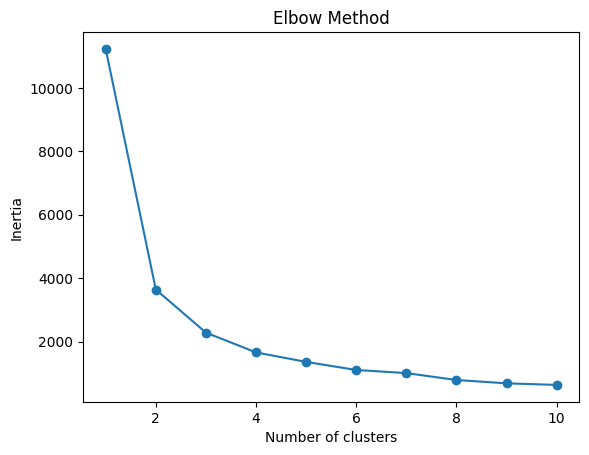

Optimal number of clusters: 2


In [ ]:
optimal_k = elbow_method(adjusted_df)
print(f"Optimal number of clusters: {optimal_k}")

In [29]:
# K-Means Algorithm with visualization
def k_means(data, k, max_iters=100):
    centroids = random.sample(data, k)  # Randomly initialize centroids
    for i in range(max_iters):
        clusters = assign_clusters(data, centroids)
        plot_clusters(data, centroids, clusters, i+1)  # Plot each iteration
        new_centroids = compute_centroids(clusters)
        if new_centroids == centroids:
            break  # Stop if centroids do not change
        centroids = new_centroids
    return centroids, clusters

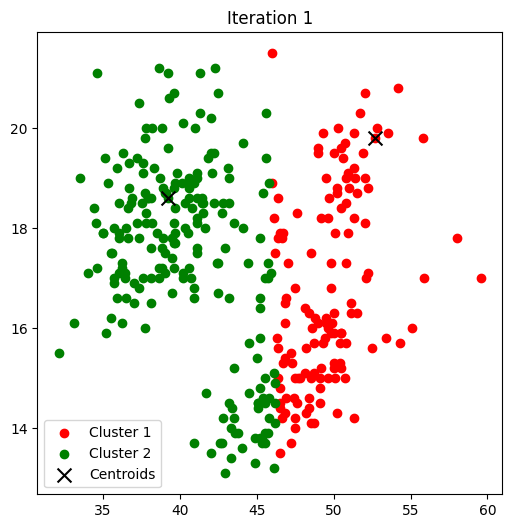

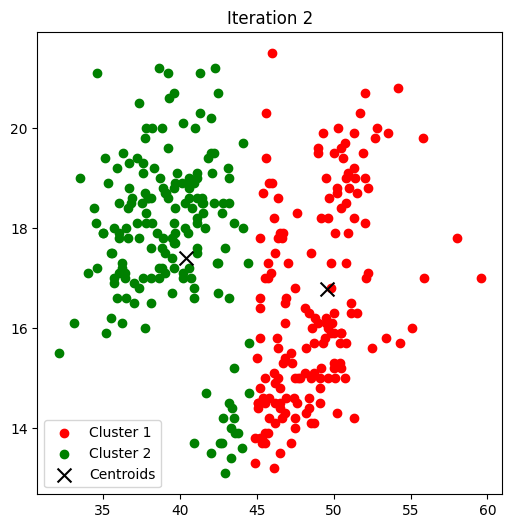

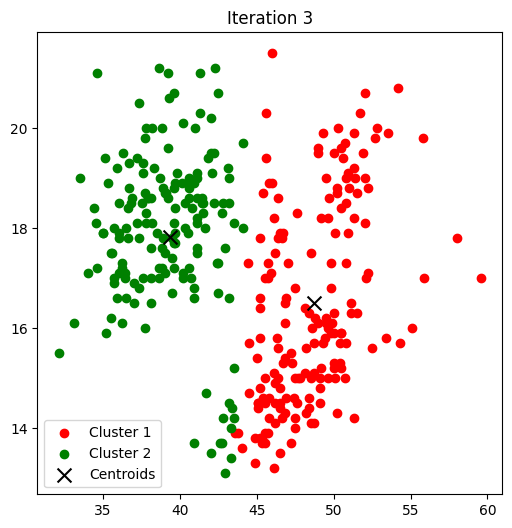

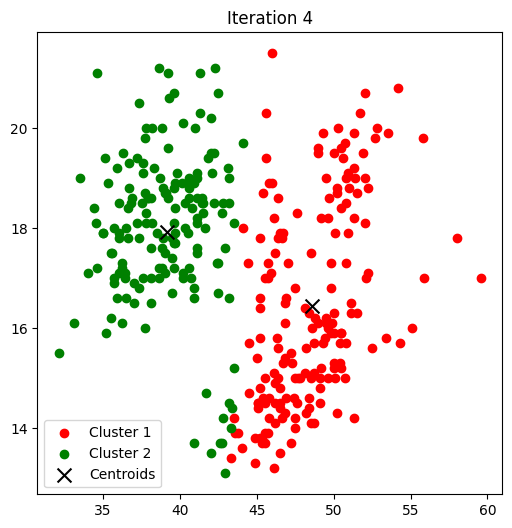

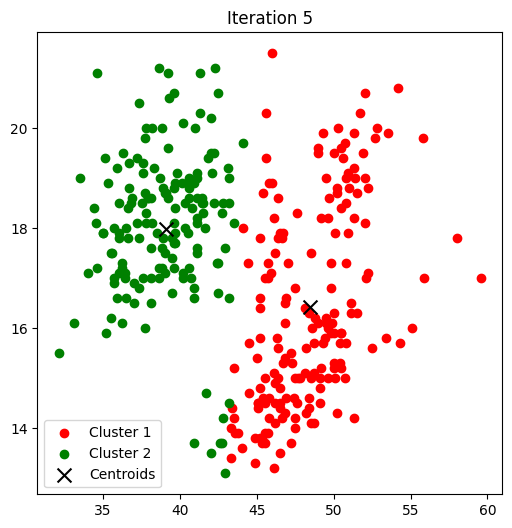

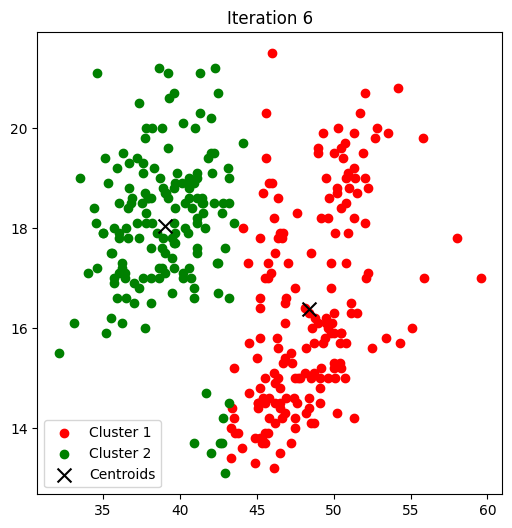

In [ ]:
# Run k-means with optimal clusters
centroids, clusters = k_means(adjusted_df.values.tolist(), optimal_k)